# <center>Informatique tc3 (Projet Web) - TD1</center>

## <center style="color: #66d">Gestion du projet avec gitlab / Base de données SQLite</center>

Dans le cadre de ce TD :
* Nous regarderons comment utiliser le serveur _gitlab_ de l'Ecole Centrale pour créer un environnement de développement collaboratif pour votre projet.
* Nous créerons une base de données et développerons du code Python pour lire des données et les réutiliser pour obtenir des représentations graphiques.

### 1. Gestion du projet avec gitlab (30 min.)

Vous venez de constituer un groupe de projet avec 4 ou 5 camarades. Pour bien gérer le développement collaboratif de votre projet vous devrez utiliser le <a href="https://gitlab.ec-lyon.fr/">serveur gitlab de l'Ecole Centrale</a>. L'usage de gitlab par __tous__ les membres du groupe de projet fera partie des critères d'évaluation.

__1.1. Prise en main de gitlab et de GitHub Desktop :__

Si vous ne l'avez pas déjà fait dans le cours INF tc2...
<div style="background-color:#eef;padding:10px;border-radius:3px">
Suivez le <a href="https://gitlab.ec-lyon.fr/sderrode/INF-TC2/-/blob/master/tuto-git-gitlab/tuto-git-gitlab.md"> tutoriel de prise en main de gitlab et de l'outil GitHub Desktop</a> 

A la suite de ce tutoriel vous devez disposer :
* d'un compte personnel opérationnel sur la serveur gitlab de l'Ecole : "https://gitlab.ec-lyon.fr"
* du logiciel GitHub Desktop installé sur votre machine

__1.2. Création de votre environnement de projet :__

Dans votre groupe un des membres (appelons-le <i>chef de projet</i>) va créer le dépôt de travail sur son espace personnel dans "https://gitlab.ec-lyon.fr" et le partager avec les autres membres du groupe.

<div style="background-color:#eef;padding:10px;border-radius:3px">
Le <i>chef de projet</i> :<ul>
<li>Crée un nouveau projet dans son espace personnel sur "gitlab.ec-lyon.fr". L'accès à ce projet devra être réglé sur "public" ou "internal".
<li>Dans l'onglet "membres" il invite les autres membres du groupe en leur donnant le statut "developer"
</ul>
<p>Tous les membres vérifient qu'ils ont bien les droits suffisants sur cet espace et, avec <i>Github Desktop</i> (ou les commandes <i>git</i> pour ceux qui maitrisent), clonent ce dossier sur leur ordinateur personnel.

Le _chef de projet_ doit communiquer au plus tôt au chargé de TD l'adresse du dépôt gitlab du projet.

### 2. Création d'une base de données SQLite (15 min.)

La base de données sera au format SQLite _(fichier .sqlite)._ Toutes les opérations sur une base de données de ce type peuvent être effectuées depuis Python via le module _sqlite3_.

Nous utiliserons l'outil "DB Browser for SQLite". Normalement, vous l'avez déjà installé dans le cadre du cours INF tc2. Sinon ... 

<div style="background-color:#eef;padding:10px;border-radius:3px">
Télécharger et installer <a href="http://sqlitebrowser.org/">DB Browser for SQLite</a> en suivant les instructions d'installation en fonction de votre système d'exploitation.
<p>
Démarrer DB Browser for SQLite.

__2.1. Création d'une base SQLite :__
<div style="background-color:#eef;padding:10px;border-radius:3px">
<p>Dans DB Browser, cliquer sur le bouton "New Database" pour créer une base de donnée :<ul>
<li>Naviguer dans l'arborescence pour se placer dans le répertoire de travail du TD1. 
<li>Nommer cette base "ter.sqlite" et l'enregistrer.
</ul>

__2.2. Importation des données :__

Dans ce TD nous travaillons sur des données ouvertes fournies par la SCNF et récupérées sur son portail https://data.sncf.com. Le fichier pris comme exemple contient les statistiques sur la régularité mensuelle des circulations des TER de janvier 2013 à nos jours. 

Le fichier  dont vous avez besoin se trouve normalement dans votre répertoire de travail (car il était dans le fichier ZIP du TD1 que vous avez décompacté).

Ce fichier est au format <a href="https://fr.wikipedia.org/wiki/Comma-separated_values">CSV</a> (Comma-Separated Values). Il s'agit d'un fichier contenant du texte (qui peut à ce titre être ouvert et consulté à l'aide du bloc-notes) qui représente un tableau de  données, dont chaque ligne contient une liste de valeurs séparées par des virgules (ou tout autre <i>caractère séparateur</i>).

Le contenu du fichier est constitué de données séparées par le caractère ; <i>point-virgule</i>. Lorsqu'une valeur contient elle-même le caractère séparateur, cette valeur est délimitée par des " <i>guillemets doubles</i>.

Il est encodé en <a href="https://fr.wikipedia.org/wiki/UTF-8">UTF-8</a>. C'est la convention choisie pour représenter les caractères alphabétiques et autres, par un code numérique sur le disque et/ou dans la mémoire de l'ordinateur.

<div style="background-color:#eef;padding:10px;border-radius:3px">
Dans le menu <i>File</i> choisir la fonction "import > Table from CSV file..."<br>
Ouvrir le fichier <tt>regularite-mensuelle-ter.csv</tt><br>
Un boite de dialogue s'ouvre :<ul>
<li>cocher la case "column names in first line"
<li>choisir comme "field separator" = ";"
<li>choisir pour "encoding" = "UTF-8"
</ul>

Normalement vous devez obtenir la structure suivante :
<img src="TD1-schemaDB.png">

Et en cliquant sur "Browse data" vous pouvez parcourir le contenu de la table :
<img src="TD1-contentDB.png">


La description des différents champs est disponible ici (section Modèle de données) :
__https://ressources.data.sncf.com/explore/dataset/regularite-mensuelle-ter/information/?disjunctive.region__

### 3. Lecture des données et premières requêtes SQL (15 min.)

L'accès à une base de données SQLite se fait en python en important le module `sqlite3` et en ouvrant une connexion avec la base. La documentation est accessible ici : __https://docs.python.org/2/library/sqlite3.html__

Pour exécuter des requêtes SQL il faut créer un objet `cursor` et appeler la méthode `execute`. les résultats sont récupérés par la méthode `fetchall` (on pourrait aussi utiliser les méthodes `fetchone` et `fetchmany`). Normalement le code suivant doit retourner le contenu de la base sous forme d'une liste de tuples.

In [2]:
import sqlite3

# ouverture d'une connexion avec la base de données
conn = sqlite3.connect('ter.sqlite')

c = conn.cursor()
c.execute("SELECT * FROM 'regularite-mensuelle-ter'")
r = c.fetchall()
for a in r:
    print (a)

('TER_12', '2017-02', 'Limousin', '3768', '3721', '47', '418', '88.8', '7.9', '"les principaux retards en Février sont liés :\n• Aux défaillances de l’infrastructure  pour 2,25 points suite en particulier à la mise en place de nouvelles LTV pour des défauts de géométrie de la voie sur ligne 4. A cela se rajoutent  des dérangements d’installations de sécurité : PN (avec des conséquences importantes sur les lignes 2 et 3), signaux, appareils de voie, block,… ainsi que des dérangements du système d’exploitation CCVIG de la ligne 8 (Limoges – Ussel)\n• Aux causes externes pour 3,17 points en nette augmentation avec principalement des épisodes venteux voire tempétueux sur le mois (journée du 04 février par exemple)\n• Aux défaillances du matériel roulant (1,9 point), en légère baisse par rapport au mois précédent, avec en particulier des défaillances  de matériel en ligne. Il est à noter une baisse notable des sorties tardives dépôt, pour lesquelles la grandes majorité restent liées à des d

En vous appuyant sur la documentation du langage SQL : __https://sqlite.org/lang.html__, réaliser les quelques exercices suivants.

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>3.1.</b> Ecrivez un programme Python qui affiche la liste des régions présentes dans la table.

In [4]:
# votre code ici


25
Limousin
Centre
Nord Pas de Calais
Basse Normandie
Franche Comté
Poitou Charentes
Rhône Alpes
Grand Est
Languedoc Roussillon
Pays de la Loire
Provence Alpes Côte d'Azur
Picardie
Midi Pyrénées
Auvergne
Lorraine
Haute Normandie
Aquitaine
Alsace
Bretagne
Bourgogne
Champagne Ardenne
Bourgogne-Franche Comté
Auvergne-Rhône Alpes
Normandie
Hauts de France


Vous remarquerez qu'il y a trop de Régions... En effet, non seulement il y a les anciennes et nouvelles régions mais en plus certaines régions ont 2 orthographes différentes !

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>3.2.</b> Ecrivez un programme Python qui affiche la liste des différents zones TER présentes dans la table (champ `ID`).

In [5]:
# votre code ici


20
TER_12
TER_7
TER_15
TER_4
TER_9
TER_18
TER_20
TER_1
TER_11
TER_16
TER_19
TER_17
TER_14
TER_3
TER_13
TER_10
TER_2
TER_6
TER_5
TER_8


<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>3.3.</b> Ecrivez un programme Python qui affiche la liste des différents paires (zones TER, Région) présentes dans la table en triant la réponse dans l'ordre croissant des zones. Vous remarquerez que depuis le nouveau découpage des régions au 1er janvier 2017, une même zone TER peut correspondre à des régions différentes...

In [6]:
# votre code ici


25
('TER_1', 'Grand Est')
('TER_1', 'Alsace')
('TER_10', 'Haute Normandie')
('TER_11', 'Languedoc Roussillon')
('TER_12', 'Limousin')
('TER_13', 'Lorraine')
('TER_14', 'Midi Pyrénées')
('TER_15', 'Nord Pas de Calais')
('TER_15', 'Hauts de France')
('TER_16', 'Pays de la Loire')
('TER_17', 'Picardie')
('TER_18', 'Poitou Charentes')
('TER_19', "Provence Alpes Côte d'Azur")
('TER_2', 'Aquitaine')
('TER_20', 'Rhône Alpes')
('TER_3', 'Auvergne')
('TER_3', 'Auvergne-Rhône Alpes')
('TER_4', 'Basse Normandie')
('TER_4', 'Normandie')
('TER_5', 'Bourgogne')
('TER_5', 'Bourgogne-Franche Comté')
('TER_6', 'Bretagne')
('TER_7', 'Centre')
('TER_8', 'Champagne Ardenne')
('TER_9', 'Franche Comté')


<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>3.4.</b> Ecrivez un programme Python qui affiche le nombre total de trains arrivés en retard pour la région Rhône-Alpes (ID='TER_20') pour l'année 2015.

_Remarque_ : la date est stockée dans le champ `Date` sous forme "AAAA-MM" ou AAAA est l'année et MM le mois.

In [7]:
# votre code ici


193386


### 4. Tracé de courbes de régularité des TER avec matplotlib (30 min.)

Après ces quelques exemples basiques, on va chercher à visualiser les données de notre table sous formes de courbes ce qui est bien plus parlant que des tableaux de chiffres.

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>4.1.</b> Ecrivez un programme Python qui récupère le contenu de la table <tt>regularite-mensuelle-ter</tt>, mois par mois, dans l'ordre, pour la région Rhône-Alpes <tt>(ID=TER_20)</tt> puis les affiche.

In [9]:
# votre code ici


60
('TER_20', '2013-01', 'Rhône Alpes', '31438', '30779', '659', '3552', '88.5', '7.7', '')
('TER_20', '2013-02', 'Rhône Alpes', '28215', '27910', '305', '3771', '86.5', '6.4', 'Météo difficile et intrusions.')
('TER_20', '2013-03', 'Rhône Alpes', '29670', '29424', '246', '3644', '87.6', '7.1', "Dérangements sur l'infrastructure.")
('TER_20', '2013-04', 'Rhône Alpes', '25660', '25326', '334', '3016', '88.1', '7.4', '')
('TER_20', '2013-05', 'Rhône Alpes', '26805', '26527', '278', '2512', '90.5', '9.6', "Bonne performance du système de production malgré les travaux sur l'axe Lyon-Grenoble.")
('TER_20', '2013-06', 'Rhône Alpes', '26957', '26586', '371', '3162', '88.1', '7.4', '')
('TER_20', '2013-07', 'Rhône Alpes', '29889', '29432', '457', '3518', '88.0', '7.4', '')
('TER_20', '2013-08', 'Rhône Alpes', '28320', '28038', '282', '2391', '91.5', '10.7', "Bons résultats en régularité et réalisation de l'offre de transport.")
('TER_20', '2013-09', 'Rhône Alpes', '28297', '27961', '336', '295

Pour tracer des courbes nous utilisons `pyplot` de la bibliothèque standard `matplotlib`. On consultera utilement <a href="http://matplotlib.org/users/pyplot_tutorial.html">ce tutoriel</a> et <a href="https://matplotlib.org/api/pyplot_summary.html">la documentation complète</a>.

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>4.2.</b>  En vous référant au <a href="http://matplotlib.org/users/pyplot_tutorial.html">tutoriel pyplot</a>, tracez la courbe de régularité correspondant à ces données.

<img src="TD1-graph1.png">

In [2]:
# votre code ici


L'affichage pour l'axe des ordonnées est correct, par contre pour les abscisses, on va chercher à afficher les dates. Pour cela on va faire une conversion de la représentation interne des dates vers le format des dates manipulables par matplotlib grace aux modules __<a href="https://docs.python.org/3/library/datetime.html">datetime</a>__ et __<a href="https://matplotlib.org/api/dates_api.html">matplotlib.dates</a>__.

In [11]:
import datetime as dt
import matplotlib.dates as pltd
x = [pltd.date2num(dt.date(int(a[1][:4]),int(a[1][5:]),1)) for a in r if not a[7] == '']
y = [a[7] for a in r if not a[7] == '']

On remarquera la présence d'un test permettant d'éliminer les points qui n'ont pas de données valides.

<div style="background-color:#eef;padding:10px;border-radius:3px">
    <b>4.3.</b> Ecrivez le code permettant de tracer la courbe en utilisant la fonction <b><a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot_date.html">plt.plot_date</a></b>. Utilisez les autres possibilités de matplotlib pour améliorer l'affichage (titre, grille, noms des axes, etc.)

<img src="TD1-graph2.png">

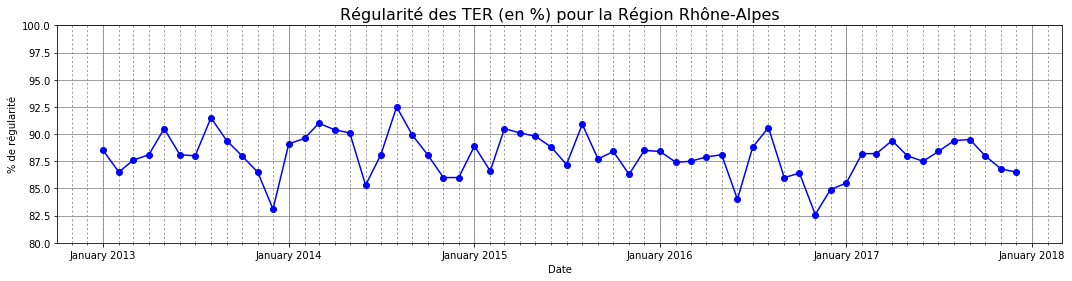

In [12]:
# votre code ici


### 5. Afficher plusieurs courbes sur le même graphique (30 min.)

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>5.1 -</b>
Pour les 6 régions définies dans la liste ci-dessous, affichez les courbes de régularités dans la couleur associée sur le même graphique.

<img src="TD1-graph3.png">

In [13]:
# Definition des régions et des couleurs de tracé
regions = [("Rhône Alpes","blue"), ("Auvergne","green"), ("Auvergne-Rhône Alpes","cyan"), ('Bourgogne',"red"), 
           ('Franche Comté','orange'), ('Bourgogne-Franche Comté','olive') ]

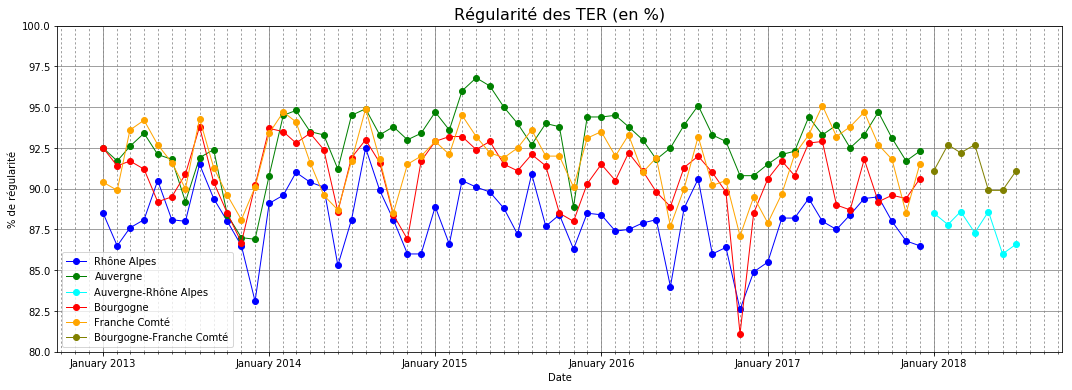

In [14]:
# votre code ici


## Annexes (travail facultatif)

L'objectif de cette partie est strictement similaire à la section 1 mais sans utiliser l'outil `DB Browser for SQLite`. Il s'agit donc de récupérer les données qui se trouvent dans le fichier `regularite-mensuelle-ter.csv` et de les importer dans une base SQLite en utilisant uniquement des fonctions Python.

### A.1. Lecture d'un fichier de données au format CSV en python

<div style="background-color:#eef;padding:10px;border-radius:3px">
En vous aidant de la <a href="https://docs.python.org/3/library/csv.html">doc python</a> pour lire un fichier csv, reproduisez le premier exemple de programme du § 14.1.1 en l'adaptant pour lire le fichier <tt>regularite-mensuelle-ter.csv</tt>. N'oubliez pas de préciser le caractère séparateur <i>(delimiter)</i> et celui servant à délimiter les valeurs <i>(quotechar)</i>. Si vous observez des caractères bizarres dans le résultat, consultez la <a href="https://docs.python.org/3.4/howto/unicode.html#reading-and-writing-unicode-data">doc python</a> et spécifiez le format du fichier dans l'instruction <tt>open</tt>.

Vous devriez observer un résultat similaire à celui-ci :
    <img src="TD1-CSV.png">
    <p><b>N.B.</b> Une fois la liste obtenue, si elle vous paraît trop longue vous pouvez cliquer dans la colonne de gauche pour la replier et éviter d'encombrer la fenêtre du sujet...

In [18]:
# votre code ici


ID; Date; Région; Nombre de trains programmés; Nombre de trains ayant circulé; Nombre de trains annulés; Nombre de trains en retard à l'arrivée; Taux de régularité; Nombre de trains à l'heure pour un train en retard à l'arrivée; Commentaires
TER_12; 2015-11; Limousin; 3954; 3906; 48; 472; 87.9; 7.3; De manière générale, les principaux retards en novembre sont liés :
• Aux défaillances de l’infrastructure pour 2,66 points suite en particulier à des dérangements de PN, signaux et compteurs d’essieux et surtout la mise en application de mesures conservatoires suite des deshuntages sur certaines parties de voie sur la ligne 11.
• Aux causes externes pour 2,84 points  avec des adhérences dégradées et de nombreuses  divagations ou heurt  de bestiaux. A noter aussi la mise en application de la procédure colis suspect sur Périgueux le 20 nov.
• Aux défaillances du matériel roulant (quasi 1,7 points), en stagnation par rapport au mois précédent avec des avaries de portes, des difficultés de for

### A.2. Création d'une base de donnée SQLite en python

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>A.2.1 -</b>
En vous aidant du premier exemple de code de la <a href="https://docs.python.org/3.4/library/sqlite3.html">doc python</a> sur l'utilisation de bases de données SQLite, créez une base de données nommée <tt>ter2.sqlite</tt> et observez dans le répertoire du TD l'appartion du fichier correspondant après exécution du code.

In [15]:
# votre code ici


<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>A.2.2 -</b>
Toujours en vous basant sur la <a href="https://docs.python.org/3.4/library/sqlite3.html">doc python</a>, ainsi que sur la <a href="https://sqlite.org/lang.html">syntaxe SQL</a> supportée par la base SQLite, créez une table nommée <tt>regularite-mensuelle-ter</tt> avec les champs suivants :
<pre style="background-color: transparent">
    ID                               // type texte
	Date                             // type texte,
	Région                           // type texte,
	Nombredetrainsprogrammés         // type entier
	Nombredetrainsayantcirculé       // type entier
	Nombredetrainsannulés            // type entier
	Nombredetrainsenretardàlarrivée  // type entier
	Tauxderégularité                 // type réel
	Nombredetrainsàlheurepouruntrainenretardàlarrivée  // type réel
	Commentaires                     // type texte
</pre>
<p><b>N.B.</b> Pour permettre l'exécution répétée de votre cellule de code, ajoutez une instruction SQL pour supprimer la table si elle existe, avant de la recréer...

In [16]:
# votre code ici


Pour vérifier la bonne création de la base de donnée ter2.sqlite, ouvrez-la avec l'outil `DB Browser for SQLite`

### A.3. Remplissage de la table de régularité

<div style="background-color:#eef;padding:10px;border-radius:3px">
<b>A.3.1 -</b>
A partir du code de la question A.1 permettant de lire le fichier CSV, créez un programme permettant d'insérer les données dans la table `regularite-mensuelle-ter`.

Vérifiez l'apparition des données et la bonne exécution de votre programme à l'aide de `DB Browser for SQLite`

In [19]:
# votre code ici


A partir de ce point on a une base de donnée similaire à celle créée dans la section 1.